In [1]:
resource = '/home/estimr2/EUCLEIA/indices/TX/yr/TX_yr_HadGEM3-A-N216_historical_r1i1p15_19600101-20131230.nc'

In [2]:
from ocgis import OcgOperations, RequestDataset, env
env.OVERWRITE=True

/homel/nhempel/.conda/envs/flyingpigeon/lib/python2.7/site-packages/ocgis/util/environment.py:33: UserWarning: Consider setting the system environment variable "GDAL_DATA=/homel/nhempel/.conda/envs/flyingpigeon/share/gdal" to improve load performance
  warn(msg)


In [3]:
rd = RequestDataset(resource, variable='TX')

In [4]:
# define a plot function:

def plot_file(resource): 
    from netCDF4 import Dataset, num2date
    from flyingpigeon.utils import get_variable

    var = get_variable(resource)
    #print 'variable name: %s' % var
    ds = Dataset(subset)
    var = ds.variables[var]
    lat = ds.variables['lat']
    lon = ds.variables['lon']

    from matplotlib import pyplot as plt
    from cartopy import config
    from cartopy.util import add_cyclic_point
    import cartopy.crs as ccrs
    from numpy import meshgrid
    # to show the plots inline
    %matplotlib inline

    lons, lats = meshgrid(lon, lat)


    cs = plt.contourf(lons, lats, var[0,:,:])
    # plot first time stepp:
    ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
    ax.coastlines()
    ax.gridlines()
    cs = plt.contourf(lons, lats, var[0,:,:], 60, transform=ccrs.PlateCarree(), interpolation='nearest')
    #plt.colorbar()

#plt.clabel(cs, inline=1, fontsize=10)


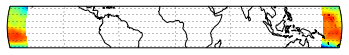

In [9]:
# Thats the piece it should be:

from cdo import Cdo
cdo = Cdo()
lonlatbox = '160,-160,-20,20'
subset = cdo.sellonlatbox(lonlatbox, input=resource, output='cdo_output.nc')
plot_file(subset)

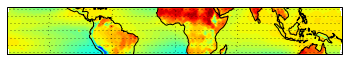

In [7]:
# cutting with ocgis to extract a region over the pacific: 

bbox = [160,-20,-160,20]
subset = OcgOperations(rd, geom=bbox,output_format='nc', spatial_wrapping='wrap',spatial_reorder=True).execute() # 
# but it is returning the reverse lon (everything else than the selected pacific region )
plot_file(subset)

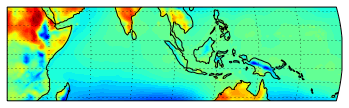

In [8]:
# cutting over the day border lon[180,-180] to extract a region over the pacific: 

bbox = [340,-20,20,20]
subset = OcgOperations(rd, geom=bbox,output_format='nc', spatial_wrapping='wrap',spatial_reorder=True).execute() # 
# but it is returning the reverse lon (everything else than the selected pacific region )
plot_file(subset)